# Instructions:
---

1. Choose a data from https://archive.ics.uci.edu
2. Perform regression analysis on your chosen dataset

In [40]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
  
# metadata 
print(real_estate_valuation.metadata) 
  
# variable information 
print(real_estate_valuation.variables) 


{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh, Tzu-Kuang Hsu', 'published_

In [53]:
X_numeric = X.select_dtypes(include='number')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
302,2013.500,16.5,2288.01100,3,24.95885,121.51359
20,2013.417,4.5,2275.87700,3,24.96314,121.51151
303,2013.500,38.3,439.71050,0,24.97161,121.53423
142,2013.417,19.8,640.60710,5,24.97017,121.54647
14,2013.500,13.2,1164.83800,4,24.99156,121.53406
...,...,...,...,...,...,...
323,2013.417,28.6,197.13380,6,24.97631,121.54436
192,2013.167,43.8,57.58945,7,24.96750,121.54069
117,2013.000,13.6,4197.34900,0,24.93885,121.50383
47,2013.583,35.9,640.73910,3,24.97563,121.53715


In [56]:
y_train

,Y house price of unit area
302,23.2
20,29.3
303,38.4
142,37.5
14,34.3
...,...
323,42.5
192,42.7
117,13.0
47,61.5


In [57]:
model = LinearRegression()
model.fit(X_train,y_train)

test_predictions = model.predict(X_test)
test_predictions

array([[40.09548022],
       [12.83819172],
       [42.00966923],
       [12.64733002],
       [42.44343803],
       [39.83198984],
       [40.55595745],
       [33.86023762],
       [49.37328265],
       [45.87031976],
       [45.86310332],
       [40.64517161],
       [39.50676203],
       [40.04955455],
       [47.11860745],
       [38.13995857],
       [40.08417262],
       [41.12540438],
       [40.83964717],
       [42.37860913],
       [49.70003677],
       [31.08231285],
       [39.67622569],
       [45.52764709],
       [46.18872415],
       [43.43143246],
       [46.35880414],
       [26.20749681],
       [48.13688227],
       [21.53997799],
       [44.8104349 ],
       [34.94131598],
       [42.6644548 ],
       [38.37379621],
       [43.98018394],
       [32.28477958],
       [47.62406077],
       [39.77407301],
       [52.55712201],
       [ 7.46443039],
       [52.54110472],
       [33.1285138 ],
       [34.22107416],
       [49.59242876],
       [15.37567885],
       [43

In [58]:
MSE = mean_squared_error(y_test,test_predictions)
r2 = r2_score(y_test, test_predictions)

print("Mean Squared Error:", MSE)
print("R-squared:", r2)

Mean Squared Error: 59.52243531902574
R-squared: 0.6573242742217984


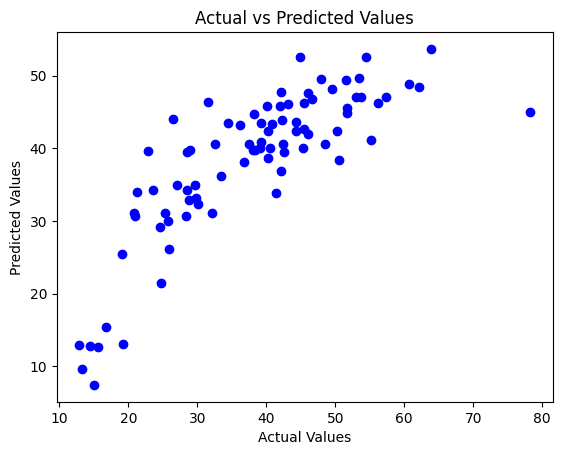

In [60]:
plt.scatter(y_test, test_predictions, color='blue')

plt.title('Actual vs Predicted Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()